*Ewing et al (2020) Structural variants at the BRCA1/2 loci are a common source of homologous repair deficiency in high grade serous ovarian carcinoma.*

# Notebook 4 - HRDetect on three HGSOC cohorts

This notebook contains the code to reproduce Figure 2.

In [2]:
sampleInfo<-read.table("SampleInformation.txt",sep="\t",header=T)
rownames(sampleInfo)<-as.character(sampleInfo[,1])
sampleInfo$BRCASNV<-as.character(sampleInfo$BRCAstatus_SV)

sampleInfo[as.character(sampleInfo$BRCAstatus)=="Germline SNV","BRCASNV"]<-"SNV"
sampleInfo[as.character(sampleInfo$BRCAstatus)=="Somatic SNV","BRCASNV"]<-"SNV"

sampleInfo$BRCASNV<-as.factor(sampleInfo$BRCASNV)

## Point plots of the HRDetect score for each sample across the three HGSOC cohorts

Set up the colour palette.

In [3]:
library(RColorBrewer)
library(ggplot2)

myColors <- c(brewer.pal(9,"Set1")[c(8,3)],"darkblue",brewer.pal(9,"Set1")[5],"deeppink2",brewer.pal(9,"Set1")[c(4,2)],"grey",brewer.pal(9,"Set1")[6])

names(myColors) <- levels(sampleInfo$BRCAstatus_SV)
fillScale <- scale_fill_manual(name = "BRCA status",values = myColors)

myColors2 <- c(brewer.pal(9,"Set1")[c(8,3)],"darkblue",brewer.pal(9,"Set1")[c(5,4,2)],"black","grey",brewer.pal(9,"Set1")[6])
names(myColors2) <- levels(sampleInfo$BRCASNV)
colScale <- scale_colour_manual(name = "BRCA SNV status",values = myColors2)

### AOCS

In [4]:
hrdetect_aocs<-sampleInfo[grep('AOCS',sampleInfo$Sample),]

ratio=13

newlevels<-c("Double deletion","Single deletion","Complex combination of SV intervals including 1+ LOF (CPX: LOF)","Duplication spanning gene (COPY_GAIN)","Inversion spanning gene (INV_SPAN)","Intragenic exonic duplication","Complex combination of SVs without LOF","SV without LOF","SV absent" )
hrdetect_aocs$BRCAstatus_SV<-factor(hrdetect_aocs$BRCAstatus_SV,levels=newlevels)

newlevels2<-c("SNV","Double deletion","Single deletion","Complex combination of SV intervals including 1+ LOF (CPX: LOF)","Duplication spanning gene (COPY_GAIN)","Inversion spanning gene (INV_SPAN)","Complex combination of SVs without LOF","SV without LOF","SV absent" )
hrdetect_aocs$BRCASNV<-factor(hrdetect_aocs$BRCASNV,levels=newlevels2)

hrdetect_aocs$Sample<-factor(hrdetect_aocs$Sample,levels=as.character(hrdetect_aocs[order(hrdetect_aocs$HRDetect),"Sample"]))

options(repr.plot.height=4,repr.plot.width=7)
HRscores_aocs_all<-ggplot(hrdetect_aocs,aes(x=as.factor(Sample),y=HRDetect,fill=as.factor(BRCAstatus_SV)))+geom_point(aes(colour=as.factor(BRCASNV)),size=6,pch=21)+theme_bw()
HRscores_aocs_all<- HRscores_aocs_all+xlab("Sample")+ylab("HRDetect Score")+ theme(axis.text.x = element_text(angle = 90, hjust = 1,size=6),legend.position="none")

options(repr.plot.width=20,repr.plot.height=4)
HRscores_aocs_all<-HRscores_aocs_all+ggtitle("Australian cohort (AOCS) - N=80")+colScale+coord_fixed(ratio=ratio)+fillScale

HRscores_aocs_all2<-HRscores_aocs_all+geom_hline(yintercept=0.7,col="red",linetype="dashed")+
annotate("text", x=0.5, y=0.75, adj=0,label= "HR Deficiency",size=3,col="red") 

### SHGSOC

In [5]:
hrdetect_shgsoc<-sampleInfo[grep('SHGSOC',sampleInfo$Sample),]

hrdetect_shgsoc$BRCAstatus_SV<-factor(hrdetect_shgsoc$BRCAstatus_SV,levels=newlevels)
hrdetect_shgsoc$Sample<-factor(hrdetect_shgsoc$Sample,levels=hrdetect_shgsoc[order(hrdetect_shgsoc$HRDetect),"Sample"])

HRscores_shgsoc_all<-ggplot(hrdetect_shgsoc,aes(x=as.factor(Sample),y=HRDetect,fill=as.factor(BRCAstatus_SV)))+geom_point(aes(colour=as.factor(BRCASNV)),size=6,pch=21)+theme_bw()
HRscores_shgsoc_all<- HRscores_shgsoc_all+xlab("Sample")+ylab("HRDetect Score")+ theme(axis.text.x = element_text(angle = 90, hjust = 1,size=6),legend.position="none")

options(repr.plot.width=20,repr.plot.height=4)

HRscores_shgsoc_all<-HRscores_shgsoc_all+colScale+ggtitle("Scottish cohort (SHGSOC) - N=85")+coord_fixed(ratio=ratio)+fillScale

HRscores_shgsoc_all2<-HRscores_shgsoc_all+geom_hline(yintercept=0.7,col="red",linetype="dashed")+
annotate("text", x=0.5, y=0.75, adj=0,label= "HR Deficiency",size=3,col="red") 

### TCGA

In [6]:
hrdetect_tcga<-sampleInfo[grep('DO',sampleInfo$Sample),]

hrdetect_tcga$BRCAstatus_SV<-factor(hrdetect_tcga$BRCAstatus_SV,levels=newlevels)
hrdetect_tcga$Sample<-factor(hrdetect_tcga$Sample,levels=hrdetect_tcga[order(hrdetect_tcga$HRDetect),"Sample"])

HRscores_tcga_all<-ggplot(hrdetect_tcga,aes(x=as.factor(Sample),y=HRDetect,fill=as.factor(BRCAstatus_SV)))+geom_point(aes(colour=as.factor(BRCASNV)),size=6,pch=21)+theme_bw()
HRscores_tcga_all<- HRscores_tcga_all+xlab("Sample")+ylab("HRDetect Score")+ theme(axis.text.x = element_text(angle = 90, hjust = 1,size=6),legend.position="none")

options(repr.plot.width=20,repr.plot.height=4)
HRscores_tcga_all<-HRscores_tcga_all+colScale+ggtitle("American cohort (TCGA) - N=45")+coord_fixed(ratio=ratio)+fillScale

HRscores_tcga_all2<-HRscores_tcga_all+geom_hline(yintercept=0.7,col="red",linetype="dashed")+
annotate("text", x=0.5, y=0.75, adj=0,label= "HR Deficiency",size=3,col="red") 

### Combined plot

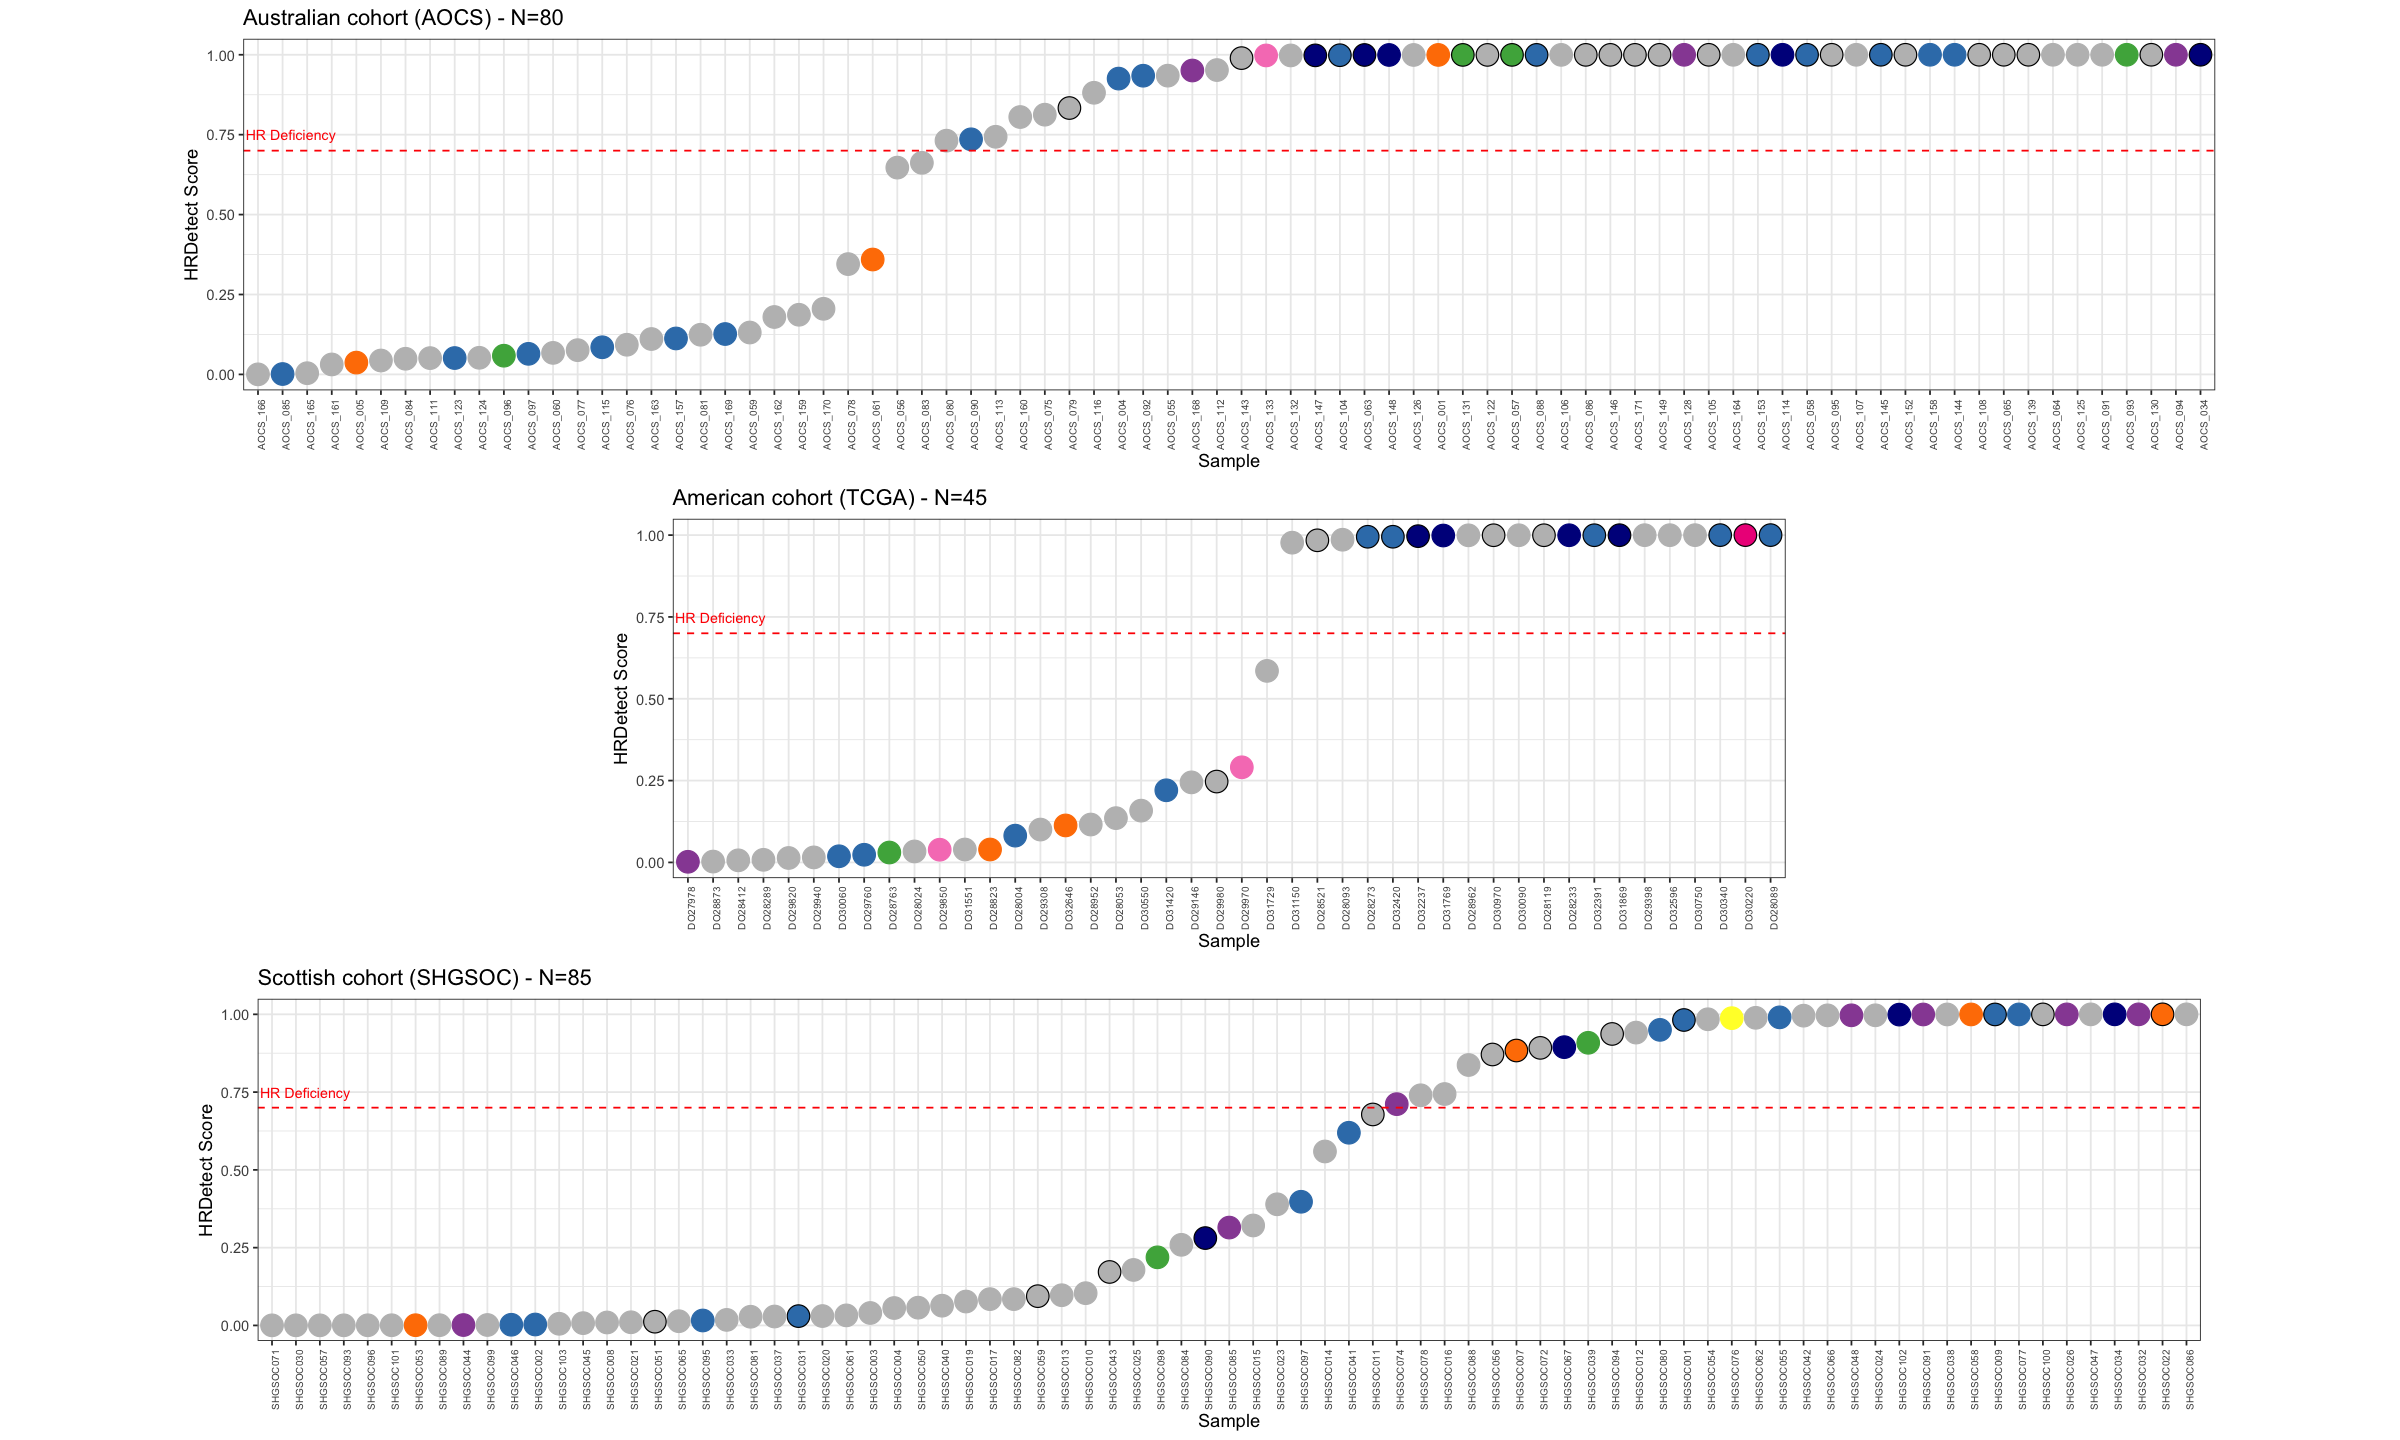

In [7]:
library(gridExtra)
options(repr.plot.height=12,repr.plot.width=20)
grid.arrange(HRscores_aocs_all2,HRscores_tcga_all2,HRscores_shgsoc_all2,nrow=3)

## Barplot of BRCA1/2 mutations in HRD samples

This is to produce figure 2b. 

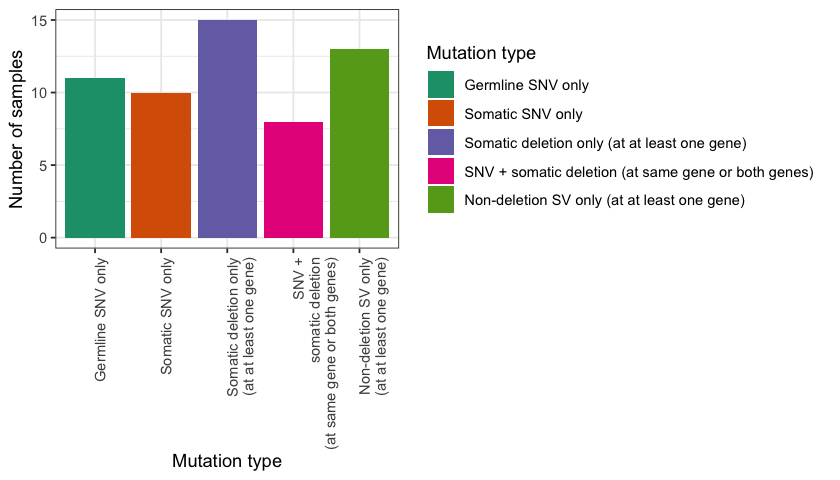

In [9]:
hrd_samples<-sampleInfo[sampleInfo$HRDetect>0.7,]
Num_germlinesnv_only<-dim(hrd_samples[hrd_samples$BRCAstatus=="Germline SNV"  & hrd_samples$BRCAstatus_SV=="SV absent",])[1]
Num_somaticsnv_only<-dim(hrd_samples[hrd_samples$BRCAstatus=="Somatic SNV"  & hrd_samples$BRCAstatus_SV=="SV absent",])[1]

Num_del_only<-dim(hrd_samples[(hrd_samples$BRCAstatus=="Deletion overlapping exon (LOF)" ),])[1]

Num_singledel_only<-dim(hrd_samples[(hrd_samples$BRCAstatus=="Deletion overlapping exon (LOF)" & 
                              hrd_samples$BRCAstatus_SV=="Single deletion"),])[1]

Num_doubledel_only<-dim(hrd_samples[(hrd_samples$BRCAstatus=="Deletion overlapping exon (LOF)" & 
                              hrd_samples$BRCAstatus_SV=="Double deletion"),])[1]

Num_snv_del_same_both<-dim(hrd_samples[(hrd_samples$BRCAstatus=="Germline SNV" | hrd_samples$BRCAstatus=="Somatic SNV") &
                              (hrd_samples$BRCAstatus_compound=="SNV + deletion (same gene)"|
                               hrd_samples$BRCAstatus_compound=="SNV + deletion (both genes)")
                               ,])[1]

Num_snv_del<-dim(hrd_samples[(hrd_samples$BRCAstatus=="Germline SNV" | hrd_samples$BRCAstatus=="Somatic SNV") &
                              hrd_samples$BRCAstatus_compound=="SNV + deletion (same gene)",])[1]
Num_snv_delboth<-dim(hrd_samples[(hrd_samples$BRCAstatus=="Germline SNV" | hrd_samples$BRCAstatus=="Somatic SNV") &
                              hrd_samples$BRCAstatus_compound=="SNV + deletions (both genes)",])[1]

Num_nondel_sv<-dim(hrd_samples[(hrd_samples$BRCAstatus!="Germline SNV" & hrd_samples$BRCAstatus!="Somatic SNV" &
     hrd_samples$BRCAstatus!="None" & hrd_samples$BRCAstatus!="Deletion overlapping exon (LOF)" &
     hrd_samples$BRCAstatus!="Complex combination of SV intervals including 1+ LOF (CPX: LOF)" & 
            hrd_samples$BRCAstatus!="BRCA1 promoter methylation"),])[1]

myColors <- c("red","#377EB8",brewer.pal(6,"Dark2")[1],brewer.pal(6,"Dark2")[3])


types<-c("SNV","Deletion","Non-deletion SV","SNV + deletion")
names(myColors) <- types

colScale <- scale_colour_manual(name = "BRCA status",values = myColors,breaks=types)

options(repr.plot.height=4,repr.plot.width=7)
df<-data.frame(Category=c("Germline SNV only","Somatic SNV only","Somatic deletion only (at at least one gene)",
                          "SNV + somatic deletion (at same gene or both genes)",
                          "Non-deletion SV only (at at least one gene)"),
               Number=c(Num_germlinesnv_only,Num_somaticsnv_only,Num_del_only,Num_snv_del_same_both,
                        Num_nondel_sv))
df$Category<-factor(df$Category,levels=c("Germline SNV only","Somatic SNV only","Somatic deletion only (at at least one gene)",
                          "SNV + somatic deletion (at same gene or both genes)",
                          "Non-deletion SV only (at at least one gene)"))

ggplot(df,aes(x=Category,y=Number,fill=as.factor(Category)))+geom_bar(stat="identity")+theme_bw()+
ylab("Number of samples")+xlab("Mutation type")+scale_fill_brewer(name="Mutation type",palette="Dark2")+
theme(axis.text.x = element_text(angle = 90, hjust = 1))+ scale_x_discrete(labels=c("Germline SNV only",
                          "Somatic SNV only",
                          "Somatic deletion only\n(at at least one gene)",
                          "SNV +\nsomatic deletion\n(at same gene or both genes)",
                          "Non-deletion SV only\n(at at least one gene)"))

## Legend for figure 2

In [ ]:
options(repr.plot.width=6,repr.plot.height=4)

dat_lg<-sampleInfo
leg_labels<-c("Deletion of both BRCA1 and BRCA2","Deletion of one of BRCA1/2","Complex combination of SVs including deletion of BRCA1/2",
                         "Duplication spanning BRCA1/2","Inversion spanning BRCA1/2",
                        "Intragenic exonic duplication at BRCA1/2","Complex combination of SVs at BRCA1/2 without deletion","SV without LOF","SV absent" )
colScale2 <- scale_colour_manual(name = "BRCA SV status",values = myColors,labels=leg_labels)
dat_lg$BRCAstatus_SV<-factor(dat_lg$BRCAstatus_SV,levels=newlevels)

ggplot(dat_lg,aes(x=BRCAstatus_SV,y=HRDetect,col=BRCAstatus_SV))+geom_point(size=6) + colScale2+theme_bw()
